In [1]:
import pandas as pd
import math
import numpy as np
import datetime
import os

D:\ProgramData\Miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\ProgramData\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
D:\ProgramData\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
D:\ProgramData\Miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
T = datetime.datetime.now()
print(T)
if T<datetime.datetime(year=2023,month=11,day=15):
    print("在期限内")
    # 在此处写原始代码




2024-02-27 19:22:58.438150


In [3]:
def Get_MRE(y_true,y_pre):
    N=len(y_true)
    y_true_ave=np.mean(y_true)
    MRE=np.sum(np.abs(y_true-y_pre)/(y_true+1e-10))/N
    return MRE

def Get_MRME(y_true,y_pre):
    N=len(y_true)
    y_true_ave=np.mean(y_true)
    MRME=np.sum(np.abs(y_true-y_pre))/y_true_ave/N
    return MRME

#求均方根误差
def Get_RMSE(y_true,y_pre):
    N=len(y_true)
    # RMSE=math.sqrt(sum((y_true-y_pre)*(y_true-y_pre))/N)
    RMSE = np.sqrt(np.sum((y_true - y_pre) * (y_true - y_pre)) / N)
    return RMSE

def Get_MSE(y_true,y_pre):
    N=len(y_true)
    # RMSE=math.sqrt(sum((y_true-y_pre)*(y_true-y_pre))/N)
    MSE = np.sum((y_true - y_pre) * (y_true - y_pre)) / N
    # return np.around(MSE,4)
    return MSE


def Get_R2(y_true, y_pre):
    RSS = np.sum((y_true - y_pre) ** 2)
    ave = np.mean(y_true)
    TSS = np.sum((y_true - ave) ** 2)
    R2 = 1 - RSS / TSS
    return R2

def Get_corr(x1,x2):
    #x1某一列Series类型
    #df2面板数据
    ser_x1=pd.Series(x1.reshape(-1))
    ser_x2=pd.Series(x2.reshape(-1))
    corr=ser_x1.corr(ser_x2,method='pearson')
    return corr


def Get_SMAPE(y_true,y_pre):
    N=len(y_true)
    # y_true_ave=np.mean(y_true)
    SMAPE=np.sum(np.abs(y_true-y_pre)/(np.abs(y_true)+np.abs(y_pre))/2)/N
    return SMAPE

# step1 数据输入

In [4]:
df_info=pd.read_excel("data/流量统计表.xlsx",skiprows=0)
df_info

,No.,STNM,STCD,lon,lat,STNM_EN
0,0,武侯镇,61800100,106.616667,33.150000,Wuhouzhen
1,1,石门,61806250,106.950000,33.200000,Shimen
2,2,汉中,61800400,107.020000,33.050000,Hanzhong
3,3,石泉水文站,61800900,108.238800,33.038200,Shiquan
4,4,喜河,61800950,108.279700,32.829400,Xihe
5,5,巴山水库,61809971,108.467397,32.112650,Bashan
6,6,蔺河口,61810550,108.940000,32.312000,Linhekou
7,7,安康库,61801250,108.866666,32.583333,Ankangku
8,8,安康,61801300,109.000000,32.683333,Ankang
9,9,向家坪,61812100,109.282778,32.863056,Xiangjiaping


In [6]:
import pypinyin
pinyin_name = []
first_pinyin = []
for i in df_info["STNM"]:
    result = pypinyin.pinyin(i, style=pypinyin.NORMAL)
    result_ = [i[0] for i in result]
    # result2 = result_[0].capitalize() + ' ' + ''.join(result_[1:]).capitalize()
    result2 = result_[0].capitalize()+''.join(result_[1:])
    result3 = ''.join([i[0].upper() for i in result_])
    print(result2, i, sep=' ')
    pinyin_name.append(result2)
    first_pinyin.append(result3)
first_pinyin

Wuhouzhen 武侯镇
Shimen 石门
Hanzhong 汉中
Shiquanshuiwenzhan 石泉水文站
Xihe 喜河
Bashanshuiku 巴山水库
Linhekou 蔺河口
Ankangku 安康库
Ankang 安康
Xiangjiaping 向家坪
Baihe 白河
Huanglongtan 黄龙滩
Danfeng(er) 丹凤(二)
Danjiangkoushuiku 丹江口水库
Huangjiagang 黄家港
Wangfuzhou 王甫州
Baishuiyu 白水峪
Xindianpu 新甸铺
Guotan 郭滩
Huangzhuang 皇庄
Bashanshuikuchuliu 巴山水库出流
Ankangkuchuliu 安康库出流
Danjiangkoushuikuchuliu 丹江口水库出流
Wangfuzhouchuliu 王甫州出流
Baishuiyuchuliu 白水峪出流


['WHZ',
 'SM',
 'HZ',
 'SQSWZ',
 'XH',
 'BSSK',
 'LHK',
 'AKK',
 'AK',
 'XJP',
 'BH',
 'HLT',
 'DF(E)',
 'DJKSK',
 'HJG',
 'WFZ',
 'BSY',
 'XDP',
 'GT',
 'HZ',
 'BSSKCL',
 'AKKCL',
 'DJKSKCL',
 'WFZCL',
 'BSYCL']

In [7]:
df_info["英文名称"]=pinyin_name
df_info

,No.,STNM,STCD,lon,lat,STNM_EN,英文名称
0,0,武侯镇,61800100,106.616667,33.150000,Wuhouzhen,Wuhouzhen
1,1,石门,61806250,106.950000,33.200000,Shimen,Shimen
2,2,汉中,61800400,107.020000,33.050000,Hanzhong,Hanzhong
3,3,石泉水文站,61800900,108.238800,33.038200,Shiquan,Shiquanshuiwenzhan
4,4,喜河,61800950,108.279700,32.829400,Xihe,Xihe
5,5,巴山水库,61809971,108.467397,32.112650,Bashan,Bashanshuiku
6,6,蔺河口,61810550,108.940000,32.312000,Linhekou,Linhekou
7,7,安康库,61801250,108.866666,32.583333,Ankangku,Ankangku
8,8,安康,61801300,109.000000,32.683333,Ankang,Ankang
9,9,向家坪,61812100,109.282778,32.863056,Xiangjiaping,Xiangjiaping


In [7]:
df_info.to_excel("站点名称增补.xlsx")

In [9]:
pinyin_name

['Wuhouzhen',
 'Shimen',
 'Hanzhong',
 'Shiquanshuiwenzhan',
 'Xihe',
 'Bashanshuiku',
 'Linhekou',
 'Ankangku',
 'Ankang',
 'Xiangjiaping',
 'Baihe',
 'Huanglongtan',
 'Danfeng(er)',
 'Danjiangkoushuiku',
 'Huangjiagang',
 'Wangfuzhou',
 'Baishuiyu',
 'Xindianpu',
 'Guotan',
 'Huangzhuang',
 'Bashanshuikuchuliu',
 'Ankangkuchuliu',
 'Danjiangkoushuikuchuliu',
 'Wangfuzhouchuliu',
 'Baishuiyuchuliu']

In [8]:
A=np.zeros((25,25))
A[0,2]=1
A[1,2]=1
A[2,3]=1
A[3,4]=1
A[4,7]=1
A[5,7]=1
A[6,7]=1
A[7,8]=1
A[8,10]=1
A[9,10]=1
A[10,13]=1
A[11,13]=1
A[12,13]=1
A[13,14]=1
A[14,15]=1
A[15,19]=1
A[16,19]=1
A[17,19]=1
A[18,19]=1
A[20,7]=1
A[21,8]=1
A[22,14]=1
A[23,19]=1
A[24,19]=1

A[20,5]=1
A[21,7]=1
A[22,13]=1
A[23,15]=1
A[24,16]=1

A[5,20]=1
A[7,21]=1
A[13,22]=1
A[15,23]=1
A[16,24]=1
np.save("Areal_25node.npy",A)
A

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 

## 1.2序列数据

In [5]:

from statsmodels.tsa.seasonal import STL

import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

皇庄
2005/5/1       956.0
2005/5/2       975.0
2005/5/3      1000.0
2005/5/4       968.0
2005/5/5      1000.0
               ...  
2020/12/23     825.0
2020/12/24     792.0
2020/12/25     749.0
2020/12/26     739.0
2020/12/27     695.0
Name: Q, Length: 5720, dtype: float64


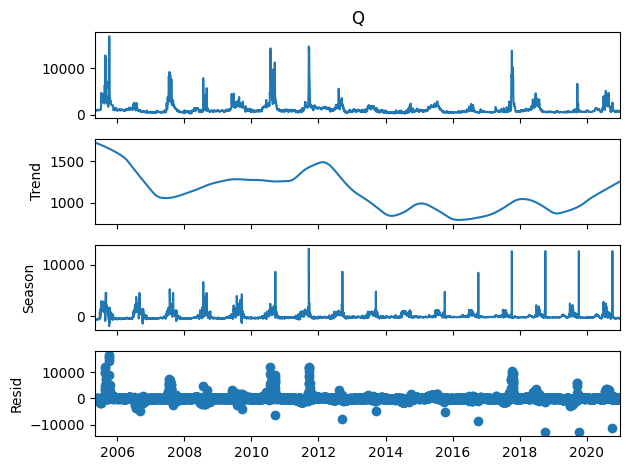

In [14]:
path=r"data/Q"
for stcd in df_info["STNM"].tolist()[19:20]:
    print(stcd)
    df_s=pd.read_csv(os.path.join(path,stcd+".csv"))
    df_s.index=df_s["TM"].to_list()
    # df_sign=df_s[["Q"]]
    df_sign=df_s["Q"]
    print(df_sign)
    # Time_list=pd.to_datetime(df_sign.index,format='%Y/%m/%d %H:%M')
    Time_list=pd.to_datetime(df_sign.index,format='%Y/%m/%d')
    # Time_list=pd.to_datetime(df_sign.index,format='%Y-%m-%d')
    df_sign.index=Time_list
    data = df_sign.resample('D').mean().ffill()
    res = STL(data, period=365, robust=True).fit()
    res.plot()



In [20]:
data

,Q
2005-05-01,7.20
2005-05-02,5.20
2005-05-03,6.20
2005-05-04,6.60
2005-05-05,5.70
...,...
2020-12-23,9.93
2020-12-24,17.30
2020-12-25,19.50
2020-12-26,19.50


In [25]:
path=r"data/Q"
for stcd in df_info["STNM"].tolist()[19:20]:
    print(stcd)
    df_s=pd.read_csv(os.path.join(path,stcd+".csv"))
    df_s.index=df_s["TM"].to_list()
    df_sign=df_s["Q"]
    # Time_list=pd.to_datetime(df_sign.index,format='%Y/%m/%d %H:%M')
    Time_list=pd.to_datetime(df_sign.index,format='%Y/%m/%d')
    # Time_list=pd.to_datetime(df_sign.index,format='%Y-%m-%d')
    df_sign.index=Time_list
    data = df_sign.resample('D').mean().ffill()
    res = STL(data).fit()
    df=res.observed
    df["trend"]=res.trend
    df["seasonal"]=res.seasonal
    df["resid"]=res.resid
    # df.to_excel(r"data/STL_Q/"+stcd+".xlsx")
df

皇庄


2005-05-01 00:00:00                                                956.0
2005-05-02 00:00:00                                                975.0
2005-05-03 00:00:00                                               1000.0
2005-05-04 00:00:00                                                968.0
2005-05-05 00:00:00                                               1000.0
                                             ...                        
2020-12-26 00:00:00                                                739.0
2020-12-27 00:00:00                                                695.0
trend                  2005-05-01    972.886247
2005-05-02    972.436...
seasonal               2005-05-01    -8.332773
2005-05-02    -4.05869...
resid                  2005-05-01    -8.553474
2005-05-02     6.62204...
Name: Q, Length: 5723, dtype: object

In [15]:
df_signs=pd.concat([res.observed,res.trend,res.seasonal,res.resid],axis=1)
df_signs

,Q,trend,season,resid
2005-05-01,956.0,1727.912919,-653.999197,-117.913721
2005-05-02,975.0,1727.500970,-628.737855,-123.763115
2005-05-03,1000.0,1727.088248,-611.090464,-115.997783
2005-05-04,968.0,1726.674748,-657.368819,-101.305928
2005-05-05,1000.0,1726.260466,-599.891931,-126.368535
...,...,...,...,...
2020-12-23,825.0,1253.261394,-386.123774,-42.137620
2020-12-24,792.0,1253.856936,-404.615027,-57.241909
2020-12-25,749.0,1254.452183,-432.482754,-72.969429
2020-12-26,739.0,1255.047137,-403.166173,-112.880964


In [9]:
# df_signs=pd.concat([res.trend,res.seasonal,res.resid],axis=1,ignore_index=True)
# df_signs

In [ ]:
path=r"data/STL_Q/"
ds_list=[]
# for i in range(len(file_list)):
for stcd in df_info["STNM"].tolist()[0:25]:
    print(stcd)
    # df_s=pd.read_csv(os.path.join(path,stcd+".csv"))
    # print(df_info["STNM"][i])
    # df_s=pd.read_csv(os.path.join(path,file_list[i]))
    # df_s=pd.read_csv(os.path.join(path,df_info["STNM"][i]+".csv"))
    df_s=pd.read_excel(os.path.join(path,stcd+".xlsx"))
    ds_list.append(df_s)
    # print(df_s.head(2))
time_length=df_s.shape[0]
# V=np.zeros((4,2,df_s.shape[0]))
V=np.zeros((len(ds_list),4,time_length))
for i in range(len(ds_list)):
    df_s=ds_list[i]
    # v_temp=df_s.iloc[-time_length:,[3,4]]
    # v_temp=df_s.iloc[-time_length:,[1]]
    # v_temp=df_s.iloc[-time_length:,[1]]
    v_temp=df_s.iloc[-time_length:,[1,2,3,4]]
    v_temp2=v_temp.to_numpy()
    v_temp3=v_temp2.T
    V[i,:,:]=v_temp3
np.save("Vreal_STL_25node.npy",V)

In [12]:
path=r"data/站点逐日水位径流数据"
for stcd in df_info["STNM"].tolist()[18:19]:
    print(stcd)
    df_s=pd.read_csv(os.path.join(path,stcd+".csv"))
    df_s.index=df_s["TM"].to_list()
    df_sign=df_s[["Q"]]
    # Time_list=pd.to_datetime(df_sign.index,format='%Y/%m/%d %H:%M')
    # Time_list=pd.to_datetime(df_sign.index,format='%Y/%m/%d')
    Time_list=pd.to_datetime(df_sign.index,format='%Y-%m-%d')
    df_sign.index=Time_list
    data = df_sign.resample('D').mean().ffill()
    res = STL(data, period=7, robust=True).fit()
    res.plot()
    # df=res.observed
    # df["trend"]=res.trend
    # df["seasonal"]=res.seasonal
    # df["resid"]=res.resid
    # df.to_excel(r"data/STL_data/"+stcd+".xlsx")

郭滩



KeyboardInterrupt



In [13]:
path=r"data/Q"
for stcd in df_info["STNM"].tolist()[20:]:
    print(stcd)
    df_s=pd.read_csv(os.path.join(path,stcd+".csv"))
    df_s.index=df_s["TM"].to_list()
    df_sign=df_s[["Q"]]
    # Time_list=pd.to_datetime(df_sign.index,format='%Y/%m/%d %H:%M')
    Time_list=pd.to_datetime(df_sign.index,format='%Y/%m/%d')
    # Time_list=pd.to_datetime(df_sign.index,format='%Y-%m-%d')
    df_sign.index=Time_list
    data = df_sign.resample('D').mean().ffill()
    res = STL(data).fit()
    df=res.observed
    df["trend"]=res.trend
    df["seasonal"]=res.seasonal
    df["resid"]=res.resid
    df.to_excel(r"data/STL_Q/"+stcd+".xlsx")

巴山水库出流
安康库出流
丹江口水库出流
王甫州出流
白水峪出流


In [14]:
path=r"data/STL_Q"
ds_list=[]
# for i in range(len(file_list)):
for stnm in df_info["STNM"].tolist():
    print(stnm)
    # df_s=pd.read_csv(os.path.join(path,stcd+".csv"))
    df_s=pd.read_excel(os.path.join(path,stnm+".xlsx"))
    # print(df_info["STNM"][i])
    # df_s=pd.read_csv(os.path.join(path,file_list[i]))
    # df_s=pd.read_csv(os.path.join(path,df_info["STNM"][i]+".csv"))
    # df_s=pd.read_excel(os.path.join(path,file_list[i]))
    ds_list.append(df_s)
    # print(df_s.head(2))
time_length=df_s.shape[0]
# V=np.zeros((4,2,df_s.shape[0]))
V=np.zeros((len(ds_list),4,time_length))
for i in range(len(ds_list)):
    df_s=ds_list[i]
    # v_temp=df_s.iloc[-time_length:,[3,4]]
    v_temp=df_s.iloc[-time_length:,[1,2,3,4]]
    v_temp2=v_temp.to_numpy()
    v_temp3=v_temp2.T
    V[i,:,:]=v_temp3
np.save("V_STL_real_25node.npy",V)

武侯镇
石门
汉中
石泉水文站
喜河
巴山水库
蔺河口
安康库
安康
向家坪
白河
黄龙滩
丹凤(二)
丹江口水库
黄家港
王甫州
白水峪
新甸铺
郭滩
皇庄
巴山水库出流
安康库出流
丹江口水库出流
王甫州出流
白水峪出流


In [6]:
from tqdm import tqdm
# import matplotlib
#
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import argparse
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from stgcn import STGCN
# from utils import generate_dataset, load_metr_la_data, get_normalized_adj
import os
import zipfile
import numpy as np
import torch
import time

def load_metr_la_data2():

    # A = np.load("Areal_3node2.npy")
    # X = np.load("Vreal_3node2.npy")
    # A = np.load("Areal_20node.npy")
    # X = np.load("V_STL_real_20node.npy")

    A = np.load("Areal_25node.npy")
    # X = np.load("V_STL_real_23node.npy")
    X = np.load("V_STL_real_25node.npy")
    A = A.astype(np.float32)
    X = X.astype(np.float32)
    print("before")
    print("A:", A.shape)
    print("X:", X.shape)
    # Normalization using Z-score method
    means = np.mean(X, axis=2)
    X = X - means.reshape(means.shape[0],means.shape[1], 1)
    stds = np.std(X, axis=2)
    X = X / stds.reshape(stds.shape[0], stds.shape[1], 1)
    print("after")
    print("A:", A.shape)
    print("X:", X.shape)
    return A, X, means, stds


def get_normalized_adj(A):
    """
    Returns the degree normalized adjacency matrix.
    """
    A = A + np.diag(np.ones(A.shape[0], dtype=np.float32))
    # print("A:", A)
    D = np.array(np.sum(A, axis=1)).reshape((-1,))
    D[D <= 10e-5] = 10e-5  # Prevent infs

    print("D:", D)
    diag = np.reciprocal(np.sqrt(D))  #将其转换为每个元素的倒数
    # print("diag:", diag)
    A_wave = np.multiply(np.multiply(diag.reshape((-1, 1)), A),
                         diag.reshape((1, -1)))
    return A_wave


def generate_dataset_i(X,feature_i=0, num_timesteps_input=12, num_timesteps_output=3):
    """
    Takes node features for the graph and divides them into multiple samples
    along the time-axis by sliding a window of size (num_timesteps_input+
    num_timesteps_output) across it in steps of 1.
    :param X: Node features of shape (num_vertices, num_features,
    num_timesteps)
    :return:
        - Node features divided into multiple samples. Shape is
          (num_samples, num_vertices, num_features, num_timesteps_input).
        - Node targets for the samples. Shape is
          (num_samples, num_vertices, num_features, num_timesteps_output).
    """
    # Generate the beginning index and the ending index of a sample, which
    # contains (num_points_for_training + num_points_for_predicting) points
    # print("X.shape:",X.shape)
    # print("num_timesteps_input:",num_timesteps_input)
    # print("num_timesteps_output:",num_timesteps_output)
    indices = [(i, i + (num_timesteps_input + num_timesteps_output)) for i in range(X.shape[2] - ( num_timesteps_input + num_timesteps_output) + 1)]

    # Save samples
    features, target = [], []
    for i, j in indices:
        features.append(
            X[:, :, i: i + num_timesteps_input].transpose(
                (0, 2, 1)))
        # target.append(X[:, 0, i + num_timesteps_input: j])
        target.append(X[:, feature_i, i + num_timesteps_input: j])
    print("features:", len(features))
    print("features[0]:", features[0].shape)
    print("target:", len(target))
    print("target[0]:", target[0].shape)
    features_torch = torch.from_numpy(np.array(features))
    target_torch = torch.from_numpy(np.array(target))
    print("features_torch:", features_torch.size())
    print("target_torch", target_torch.size())
    return torch.from_numpy(np.array(features)), torch.from_numpy(np.array(target))



def train_epoch(training_input, training_target, batch_size):
    """
    Trains one epoch with the given data.
    :param training_input: Training inputs of shape (num_samples, num_nodes,
    num_timesteps_train, num_features).
    :param training_target: Training targets of shape (num_samples, num_nodes,
    num_timesteps_predict).
    :param batch_size: Batch size to use during training.
    :return: Average loss for this epoch.
    """
    # permutation = torch.randperm(training_input.shape[0])
    # permutation = torch.from_numpy(np.array([i for  i in range(training_input.shape[0])]))
    permutation =torch.arange(0,training_input.shape[0])
    epoch_training_losses = []
    for i in range(0, training_input.shape[0], batch_size):
        # print(i)
        net.train()
        optimizer.zero_grad()

        indices = permutation[i:i + batch_size]
        X_batch, y_batch = training_input[indices], training_target[indices]
        X_batch = X_batch.to(device=args.device)
        y_batch = y_batch.to(device=args.device)

        out = net(A_wave, X_batch)
        loss = loss_criterion(out, y_batch)
        loss.backward()
        optimizer.step()
        epoch_training_losses.append(loss.detach().cpu().numpy())
    return sum(epoch_training_losses) / len(epoch_training_losses)

# step2  模型训练部分

In [7]:
# torch.empty()
torch.manual_seed(42)
use_gpu = True
num_timesteps_output =7
feature_i=0
batch_size = 100
num_timesteps_input =11
parser = argparse.ArgumentParser(description='STGCN')
parser.add_argument('--enable-cuda', action='store_true',
                    help='Enable CUDA')
# args = parser.parse_args() #z jupyter 中会报错
args,unkouwn=parser.parse_known_args()
args.device = None
if args.enable_cuda and torch.cuda.is_available():
    args.device = torch.device('cuda')
else:
    args.device = torch.device('cpu')
A, X, means, stds = load_metr_la_data2()
A_wave = get_normalized_adj(A)
A_wave = torch.from_numpy(A_wave)
A_wave = A_wave.to(device=args.device)
print("A.shape:",A.shape)
print("X.shape",X.shape)
split_line1 = int(X.shape[2] * 0.7)
split_line2 = int(X.shape[2] *1)
train_original_data = X[:, :, :split_line1]
val_original_data = X[:, :, split_line1:split_line2]

training_input, training_target = generate_dataset_i(train_original_data,
                                                     feature_i=feature_i,
                                                     num_timesteps_input=num_timesteps_input,
                                                     num_timesteps_output=num_timesteps_output)
val_input, val_target = generate_dataset_i(val_original_data,
                                           feature_i=feature_i,
                                           num_timesteps_input=num_timesteps_input,
                                           num_timesteps_output=num_timesteps_output)

before
A: (25, 25)
X: (25, 4, 5720)
after
A: (25, 25)
X: (25, 4, 5720)
D: [2. 2. 2. 2. 2. 3. 2. 3. 2. 2. 2. 2. 2. 3. 2. 3. 3. 2. 2. 1. 3. 3. 3. 3.
 3.]
A.shape: (25, 25)
X.shape (25, 4, 5720)
features: 3986
features[0]: (25, 11, 4)
target: 3986
target[0]: (25, 7)
features_torch: torch.Size([3986, 25, 11, 4])
target_torch torch.Size([3986, 25, 7])
features: 1700
features[0]: (25, 11, 4)
target: 1700
target[0]: (25, 7)
features_torch: torch.Size([1700, 25, 11, 4])
target_torch torch.Size([1700, 25, 7])


In [4]:
int(5720*0.7)

4003

In [5]:
(4003-17)

3986

In [6]:
5720-4003-17

1700

100%|██████████| 1/1 [00:04<00:00,  4.32s/it]

time_sum: 4.3237903118133545


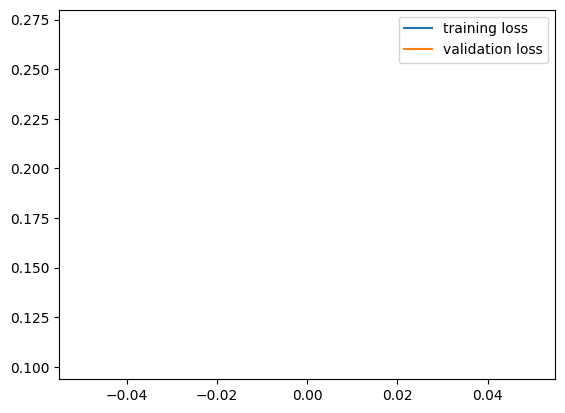

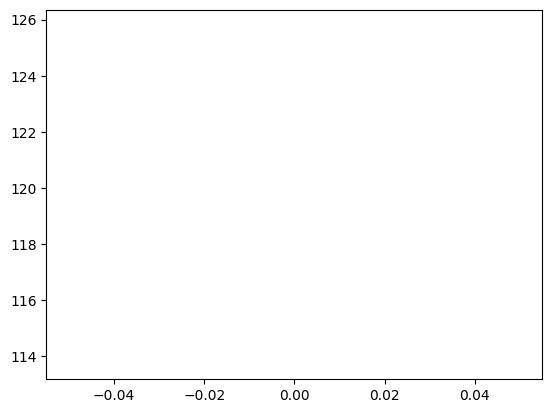

C:\Users\39362\AppData\Local\Temp\ipykernel_20892\2228661037.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_Q1["y_hat"+"day_"+str(day_i)+"stcd_"+str(stcd_i)]=y_hat
C:\Users\39362\AppData\Local\Temp\ipykernel_20892\2228661037.py:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_Q1["y_real"+"day_"+str(day_i)+"stcd_"+str(stcd_i)]=y_real
C:\Users\39362\AppData\Local\Temp\ipykernel_20892\2228661037.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

        NSE1         MAPE1    SMAPE1       RMSE1     Corr1         STD1  \
0   0.815510  1.049940e+08  0.109417   42.347208  0.927781    71.312363   
1   0.459571  4.645389e-01  0.103838  160.597502  0.849722    74.334404   
2   0.706623  6.053421e-01  0.110751   85.853415  0.860786   107.591774   
3   0.588918  1.008078e+01  0.204694  701.402883  0.802609  1004.395386   
4   0.845363  6.197139e-01  0.090929  232.728542  0.921118   515.192200   
5   0.725194  2.361879e+08  0.094119   32.192610  0.883597    40.283100   
6   0.726085  1.864600e+08  0.080803   27.680921  0.868594    37.407051   
7   0.824388  3.803768e-01  0.073521  369.424366  0.926768   659.202515   
8   0.849933  3.165922e-01  0.068773  395.954198  0.945259   780.571533   
9   0.786643  1.076462e+00  0.102212   61.279432  0.904272    97.640572   
10  0.881778  3.646983e-01  0.068723  351.440264  0.951472   829.101746   
11  0.724275  1.278649e+00  0.132409  116.551917  0.888801   143.747192   
12  0.789384  5.672891e-0

C:\Users\39362\AppData\Local\Temp\ipykernel_20892\2228661037.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_Q1["y_hat"+"day_"+str(day_i)+"stcd_"+str(stcd_i)]=y_hat
C:\Users\39362\AppData\Local\Temp\ipykernel_20892\2228661037.py:79: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_Q1["y_real"+"day_"+str(day_i)+"stcd_"+str(stcd_i)]=y_real
C:\Users\39362\AppData\Local\Temp\ipykernel_20892\2228661037.py:78: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

,STGCN-NSE,STGCN-MAPE,STGCN-SMAPE,STGCN-RMSE
0,0.929916,0.109193,0.025909,300.528867
1,0.925829,0.095755,0.022879,309.155053
2,0.921202,0.114121,0.026958,318.641056
3,0.909867,0.124422,0.029222,340.780019
4,0.865588,0.147904,0.034005,416.143731
5,0.812781,0.189435,0.042771,491.126992
6,0.781769,0.179406,0.040851,530.244854


In [10]:
training_losses = []
validation_losses = []
validation_maes = []
torch.cuda.empty_cache()
loss_criterion = nn.MSELoss()
lr=1e-3
epochs=50
# epoch_start=1
# net = STGCN(A_wave.shape[0],
#             training_input.shape[3],
#             num_timesteps_input,
#             num_timesteps_output).to(device=args.device)
# model_path=r"train_result/node25/STL_STGCN_RunOff_lr"+str(lr)+"epoch"+str(epochs)
path_model="train_result/node25/STL_STGCN_RunOff_lr0.001epoch50lr0.0001epoch100.pmk"
net=torch.load(path_model)
lr=1e-4
epoch_start=1
epochs=1
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
model_path=r"train_result/node25/STL_STGCN_RunOff_lr0.001epoch50lr"+str(lr)+"epoch"+str(epochs)
# epoch_start=100
# epochs=100
time_start = time.time()  # 记录开始时间
for epoch in tqdm(range(epoch_start,epochs+1)):
    # for epoch in tqdm(range(epoch_start,51)):
    loss = train_epoch(training_input, training_target,batch_size=batch_size)
    training_losses.append(loss)
    # if epoch==50:
    #     torch.save(net,"train_model/STL_STGCN_RS_RunOff_epoch_"+str(epoch)+".pmk")
    with torch.no_grad():
        net.eval()
        val_input = val_input.to(device=args.device)
        val_target = val_target.to(device=args.device)
        out = net(A_wave, val_input)
        val_loss = loss_criterion(out, val_target).to(device="cuda")
        # val_loss = loss_criterion(out, val_target).to(device="cuda")
        # validation_losses.append(np.asscalar(val_loss.detach().numpy())) #使用numpy.ndarray.item（）代替asscalar（）
        # validation_losses.append(np.ndarray.item(val_loss.detach().numpy()))
        validation_losses.append(np.ndarray.item(val_loss.cpu().numpy()))
        out_unnormalized = out.detach().cpu().numpy()*stds[:,feature_i].reshape(1,-1,1)+means[:,feature_i].reshape(1,-1,1)
        target_unnormalized = val_target.detach().cpu().numpy() *stds[:,feature_i].reshape(1,-1,1)+means[:,feature_i].reshape(1,-1,1)
        mae = np.mean(np.absolute(out_unnormalized - target_unnormalized))
        validation_maes.append(mae)
        out = None
        # val_input = val_input.to(device="cpu")
        # val_target = val_target.to(device="cpu")
        val_input = val_input.to(device="cuda")
        val_target = val_target.to(device="cuda")

df_train=pd.DataFrame()
df_train["training_losses"]=training_losses
df_train["validation_losses"]=validation_losses
df_train["validation_maes"]=validation_maes

time_end = time.time()  # 记录结束时间
time_sum = time_end - time_start  # 计算的时间差为程序的执行时间，单位为秒/s
print("time_sum:",time_sum)


import matplotlib.pyplot as plt
plt.plot(training_losses, label="training loss")
plt.plot(validation_losses, label="validation loss")
plt.legend()
plt.savefig("训练和检验过程.png",transparent=True)
plt.show()

plt.plot(validation_maes, label="validation  maes")
plt.show()
df_P1=pd.DataFrame()
df_Q1=pd.DataFrame()
# P_list=["NSE","MAPE","MRME","RMSE","Corr","STD","MEAN"]
for stcd_i in range(out_unnormalized.shape[1]):
    dict_p={}
    for day_i in range(out_unnormalized.shape[2]):
        # print("day_i:",day_i)
        y_hat = [out_unnormalized[i, stcd_i, day_i] for i in range(out_unnormalized.shape[0])]
        y_real = [target_unnormalized[i, stcd_i, day_i] for i in range(target_unnormalized.shape[0])]
        df_Q1["y_hat"+"day_"+str(day_i)+"stcd_"+str(stcd_i)]=y_hat
        df_Q1["y_real"+"day_"+str(day_i)+"stcd_"+str(stcd_i)]=y_real
        dict_p["NSE"+str(day_i+1)]=Get_R2(np.array(y_real),np.array(y_hat))
        dict_p["MAPE"+str(day_i+1)]=Get_MRE(np.array(y_real),np.array(y_hat))
        dict_p["SMAPE"+str(day_i+1)]=Get_SMAPE(np.array(y_real),np.array(y_hat))
        dict_p["RMSE"+str(day_i+1)]=Get_RMSE(np.array(y_real),np.array(y_hat))
        dict_p["Corr"+str(day_i+1)]=Get_corr(np.array(y_real),np.array(y_hat))
        dict_p["STD"+str(day_i+1)]=np.std(y_hat)
        dict_p["MEAN"+str(day_i+1)]=np.mean(y_hat)
    df_P1=df_P1._append(dict_p,ignore_index=True)
    # col_name_list=[ col_name+ str(day_i+1) for day_i in range(out_unnormalized.shape[2]) for col_name in P_list]
    # df_P1=df_P1[col_name_list]


print(df_P1)
stcd_i=19
P_list=["NSE","MAPE","SMAPE","RMSE","Corr","STD","MEAN",]
p_index_list=[0,1,2,3]
df_P_Choose=pd.DataFrame()
for i in range(df_P1.shape[0]):
    for p_index,p_value in enumerate(p_index_list):
        df_P_Choose["STGCN"+"-"+P_list[p_index]]=df_P1.iloc[stcd_i,[i*7+p_value   for i in range(num_timesteps_output)]].tolist()
# print(df_P_Choose)
df_P_Choose

In [13]:
torch.save(net,"RRS-STL-STGCN.pmk")
writer=pd.ExcelWriter("RRS-STL-STGCN.xlsx")
df_train.to_excel(writer,sheet_name="迭代过程")
df_P1.to_excel(writer,sheet_name="指标评价")
df_Q1.to_excel(writer,sheet_name="预测结果", index=None)
df_P_Choose.to_excel(writer,sheet_name="20站点指标评价", index=None)
writer.close()

# 模型保存